# Homework 25 Solutions

This assignment uses the dataset of all NYC restaurant inspection results from Jan. 1, 2019 - Aug. 30, 2019 from Homework 24. The original, unfiltered dataset is at https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j.

Download the filtered dataset from: [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/DOHMH_New_York_City_Restaurant_Inspection_Results_Feb2020.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/DOHMH_New_York_City_Restaurant_Inspection_Results_Feb2020.csv)

Information about how restaurants are inspected and graded in NYC is here: https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf(https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

### Question 1:  Load and clean the data

Load the restaurant data and do the following to clean it:
1. Create a new DataFrame with only the columns `BORO` (the restaurant's borough) and `SCORE` (the restaurant's inspection score).
2. Remove any rows in the new DataFrame with missing data.
3. Filter the data to only keep the restaurants (rows) in the Bronx and Queens.

In [4]:
restaurants = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/DOHMH_New_York_City_Restaurant_Inspection_Results_Feb2020.csv")
restaurants.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41722899,MI CANDILEJAS RESTAURANT,Brooklyn,1509,MERMAID AVENUE,11224.0,7182666161,Latin American,02/01/2020,U,10F,Non-food contact surface improperly constructe...,G,27.0,NaN,NaN,04/30/2021,Cycle Inspection / Initial Inspection,40.576835,-73.982872,313.0,47.0,34800.0,3256857.0,3.070220e+09,BK21
1,50015528,THE BEAST NEXT DOOR,Queens,42-51,27 STREET,11101.0,6466392345,American,02/01/2020,D,04N,Filth flies or food/refuse/sewage-associated (...,C,10.0,A,02/01/2020,04/30/2021,Cycle Inspection / Re-inspection,40.748916,-73.940980,402.0,26.0,1900.0,4005106.0,4.004310e+09,QN31
2,50073026,HIBACHI STATION,Queens,8312,37TH AVE,11372.0,6466332522,Japanese,02/01/2020,D,10F,Non-food contact surface improperly constructe...,G,9.0,A,02/01/2020,04/30/2021,Cycle Inspection / Initial Inspection,40.749852,-73.883160,403.0,21.0,28100.0,4036224.0,4.014710e+09,QN28
3,50081649,PAULIE GEE SLICE JOINT,Brooklyn,110,FRANKLIN STREET,11222.0,9293376385,Pizza,02/01/2020,D,06A,Personal cleanliness inadequate. Outer garment...,C,12.0,A,02/01/2020,04/30/2021,Cycle Inspection / Initial Inspection,40.728349,-73.957332,301.0,33.0,56100.0,3064950.0,3.025690e+09,BK76
4,41127209,BACI & ABBRACCI,Brooklyn,204,GRAND STREET,11211.0,7185996599,Italian,02/01/2020,D,08A,Facility not vermin proof. Harborage or condit...,G,12.0,A,02/01/2020,04/30/2021,Cycle Inspection / Initial Inspection,40.714096,-73.960342,301.0,34.0,55100.0,3062796.0,3.023930e+09,BK73


In [5]:
restaurants2 = restaurants[["BORO","SCORE"]]
restaurants2.head()

,BORO,SCORE
0,Brooklyn,27.0
1,Queens,10.0
2,Queens,9.0
3,Brooklyn,12.0
4,Brooklyn,12.0


In [ ]:
restaurants2.dropna(inplace = True)

In [10]:
bronx_filter = restaurants2["BORO"] == "Bronx"
queens_filter = restaurants2["BORO"] == "Queens"
bxq_restaurants = restaurants2[bronx_filter | queens_filter]
bxq_restaurants.head()

,BORO,SCORE
1,Queens,10.0
2,Queens,9.0
6,Queens,47.0
7,Queens,47.0
8,Queens,47.0


### Question 2

Is the mean inspection score different for restaurants in the Bronx that for restaurants in Queens?  We will conduct a permutation test to answer this question.

#### Question 2a
What are the null and alternative hypotheses?

**2a answer:** Null hypothesis:  The mean inspection score for restaurants in the Bronx is the same as the mean inspection score for restaurants in Queens.
 
Alternative hypothesis:  The mean inspection score for restaurants in the Bronx is different than the mean inspection score for restaurants in Queens.

### Question 2b
Compute the test statistic from the data.  That is, compute the difference between the mean test score for Bronx restaurants and the mean test score for Queens restaurants.

In [13]:
bronx_filter = bxq_restaurants["BORO"] == "Bronx"
bronx_restaurants = bxq_restaurants[bronx_filter]
bronx_score_mean = bronx_restaurants["SCORE"].mean()
bronx_score_mean

17.9130060292851

In [14]:
queens_filter = bxq_restaurants["BORO"] == "Queens"
queens_restaurants = bxq_restaurants[queens_filter]
queens_score_mean = queens_restaurants["SCORE"].mean()
queens_score_mean

21.121893088185224

In [16]:
# compute the difference in means for the data
np.abs(bronx_score_mean - queens_score_mean)

3.2088870589001246

### Question 2c

Add a new column to your DataFrame that is a permutation of the restaurant boroughs column.

In [17]:
bxq_restaurants["permuted_borough"] = np.random.permutation(bxq_restaurants["BORO"])
bxq_restaurants.head()

/Users/megan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,BORO,SCORE,permuted_borough
1,Queens,10.0,Queens
2,Queens,9.0,Queens
6,Queens,47.0,Bronx
7,Queens,47.0,Queens
8,Queens,47.0,Bronx


### Question 2d

Use a permutation test to find the distribution of the test statistic (the difference between the means) under the null hypothesis.  That is, using the Bronx and Queens restaurant data, do 10,00, simulations where the borough column is permuted and the difference of the mean score of the Bronx restaurants and the mean score of the Queens restaurants for the permuted data is computed.

Plot a histogram of these these mean differences.

In [19]:
mean_diffs = []
for i in range(1000):
    bxq_restaurants["permuted_borough"] = np.random.permutation(bxq_restaurants["BORO"])
    
    bx_filter = bxq_restaurants["permuted_borough"] == "Bronx"
    bx_rests = bxq_restaurants[bx_filter]
    bx_mean = bx_rests["SCORE"].mean()

    q_filter = bxq_restaurants["permuted_borough"] == "Queens"
    q_rests = bxq_restaurants[q_filter]
    q_mean = q_rests["SCORE"].mean()

    diff = np.abs(bx_mean - q_mean)
    mean_diffs.append(diff)

/Users/megan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Frequency')

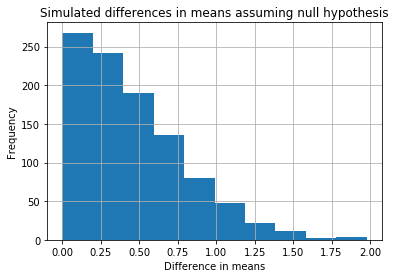

In [20]:
pd.Series(mean_diffs).hist()
plt.title("Simulated differences in means assuming null hypothesis")
plt.xlabel("Difference in means")
plt.ylabel("Frequency")

### Question 2e

Use the data test statistic computed in (2b) and the histogram from (2d) to reject or fail to reject the null hypothesis.  What is your conclusion and why? 

**2e answer:** The data test statistic is 3.21, which is significantly larger than the last value on the histogram.  Thus it is unlikely that the data test statistic came from the same distribution as the histogram.  Thus we reject the null hypothesis.